## 其实是模仿pytorch造了一个小库，但没用pytorch，只用了numpy，hhh（以防误会emm）


In [1]:
# 实验参数设置
!cat cfg.py | grep 'lr'
!cat cfg.py | grep 'batch_size'
!cat cfg.py | grep 'epoch'

lr = 2e-4
batch_size = 256
epoch = 50


In [2]:
# 训练MLP的命令
# 训练两层的MLP
# !python train.py --log-dir ./log/ --save-dir ./model/2_layers/

# 训练三层的MLP
# !python train.py --log-dir ./3_layers_log/ --save-dir ./model/3_layers/ --nl 3 --dim-list 784 512 512

In [3]:
# 训练集上的最终准确率
!echo '2 layers:' && (cat ./log/train.log | grep 'Train Epoch 50')
!echo '3 layers:' && (cat ./3_layers_log/train.log | grep 'Train Epoch 50')

2 layers:
2022-10-17 21:16:52,107 - train.py[line:123] - INFO: Train Epoch 50 --- train loss : 0.053756208768434295 --- train accuracy:0.9867833333333333
3 layers:
2022-10-17 23:47:59,523 - train.py[line:125] - INFO: Train Epoch 50 --- train loss : 0.015267798793148345 --- train accuracy:0.9981666666666666


--------------------
# 显示训练曲线图：
![2 layers](./log/curve.png)

--------------------

![3_layers](./3_layers_log/curve.png)

one hot code :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Text(24, 24, '8')

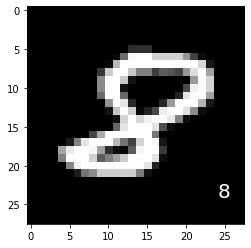

In [4]:
from dataset import MNIST_Dataset
import matplotlib.pyplot as plt
%matplotlib inline
dataset1 = MNIST_Dataset()
plt.figure()
counter2 = 0
print('one hot code : ',dataset1.test_label[61])
for each in dataset1.test_label[61]: # 把one-hot转成category
    if each == 0:
        counter2+=1
    else:
        break
plt.imshow(dataset1.test_data[61].reshape(28,28), cmap="gray")
plt.text(24, 24, str(counter2), fontsize=20, color=[1, 1, 1])

In [5]:
# load two layers(i.e.:only one hidden layer) MLP
import pickle
from model import MLP
with open('./model/2_layers/mlp_epoch50.qbw','rb') as f:
    state_dict = pickle.load(f)
mlp = MLP(n_layers=2,n_class=10,dim_list=[784,512])
mlp.load_state_dict(state_dict)
print(mlp.layers) # two linear layers, one CrossEntropyLoss layer(softmax with Negtive Logistic Likelihood Loss
print(type(mlp.layers[0].weight)) # self-implement Tensor class
print('---'.join(map(str,[mlp.layers[0].weight.shape,mlp.layers[1].weight.shape])))

[<layers.Linear object at 0x7fcf384207c0>, <layers.Linear object at 0x7fcf384145e0>, <layers.CrossEntropyLoss object at 0x7fcf38420a30>]
<class 'tensor.Tensor'>
(784, 512)---(512, 10)


In [6]:
# try to predict one example
example = dataset1.test_data[729].reshape(1,-1)
cls = dataset1.test_label[729].reshape(1,-1)
from tensor import Tensor # self-implement Tensor class
example = Tensor(value=example)
mlp.eval() # don't compute the gradient & no need to store temp variable
pred,test_loss = mlp(example,cls)

In [7]:
from utils import compute_acc
if compute_acc(pred.value,cls):
    print(True)
else:
    print(False)

True


Text(1, 2, 'gt:6')

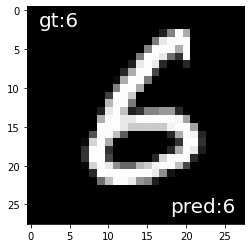

In [8]:
pred_cls = pred.value.argmax(axis=1)
gt_cls = cls.argmax(axis=1) # 只有一位为1，其他位都是0
plt.figure()
plt.imshow(example.value.reshape(28,28), cmap="gray")
plt.text(18, 26, f'pred:{int(pred_cls)}', fontsize=20, color=[1, 1, 1])
plt.text(1, 2, f'gt:{int(gt_cls)}', fontsize=20, color=[1, 1, 1])
# import cv2
# cv2.imwrite('./6.png',example.value.reshape(28,28)*255)

In [9]:
# 查看test set上的test accuracy
'''
两层的MLP做test：
!python test.py --model-path ./model/2_layers/mlp_epoch50.qbw 
三层的MLP做test：
!python test.py --model-path ./model/3_layers/mlp_epoch50.qbw --nl 3 --dim-list 784 512 512
'''
!cat ./test_log/test.log

2022-10-17 23:25:28,521 - test.py[line:68] - INFO: Test Model Path: ./model/2_layers/mlp_epoch50.qbw --- test loss : 0.07955832918741779 --- test accuracy:0.9764
2022-10-18 00:01:28,568 - test.py[line:70] - INFO: Test Model Path: ./model/3_layers/mlp_epoch50.qbw --- test loss : 0.06740434573131972 --- test accuracy:0.9791
